# Laugh test 1: Storage and transmission in soils
This notebook plots SUMMA simulations for the test case defined in Celia et al. (1990). 

## Expectations
The simulations should reproduce Figure 6 in Celia et al. (1990):

![Figure 6a in Celia et al. (1990)](https://raw.githubusercontent.com/CH-Earth/laughTests/master/lt1_celia1990/img/celia1990_fig6.png?token=ABZLT4QHL6TTO53YA2V4CP27DMWDU)

## Meta data

| Data  | Value  |
|:---|:---|
| Model name| Structure for Unifying Multiple Modelling Alternatives (SUMMA) |
| Model version  | See attributes in output .nc file |
| Model reference | Clark et al. (2015a,b) |
| Model runs by | R. Zolfaghari |
| Notebook code by | W. Knoben, A. Bennett |
    
## Reference(s)
Celia, M. A., E. T. Bouloutas, and R. L. Zarba (1990), A general mass conservative numerical solution for the unsaturated flow equation, Water Resour. Res., 26(7), 1483–1496, doi:10.1029/WR026i007p01483

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Rasmussen, R. M. (2015a). A unified approach for process-based hydrologic modeling: 1. Modeling concept. Water Resources Research, 51(4), 2498–2514. https://doi.org/10.1002/2015WR017198

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Marks, D. G. (2015b). A unified approach for process-based hydrologic modeling: 2. Model implementation and case studies. Water Resources Research, 51, 2515–2542. https://doi.org/10.1002/2015WR017200

In [1]:
# modules
from pathlib import Path
from datetime import datetime
import xarray as xr # note, also needs netcdf4 library installed
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Specify the data locations relative to the notebook
sim_path = Path("./output")
sim_name = "celia1990_output_timestep.nc"

In [3]:
# Specify plotting dimensions
timesteps = [10,32,49]
midToto = 0

In [4]:
# Specify the base time
time_ref = datetime.strptime('2000-01-01 0:00:00', '%Y-%m-%d %H:%M:%S')

Processing starts here

In [5]:
# Load the data
ds = xr.open_dataset( sim_path / sim_name ).isel(hru=0, gru=0).load()

In [6]:
# Remove the mising data layers
ds = ds.where(ds['mLayerDepth'] != -9999, drop=True)

In [7]:
# Ensure that we can actually read the figure labels
font = {'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

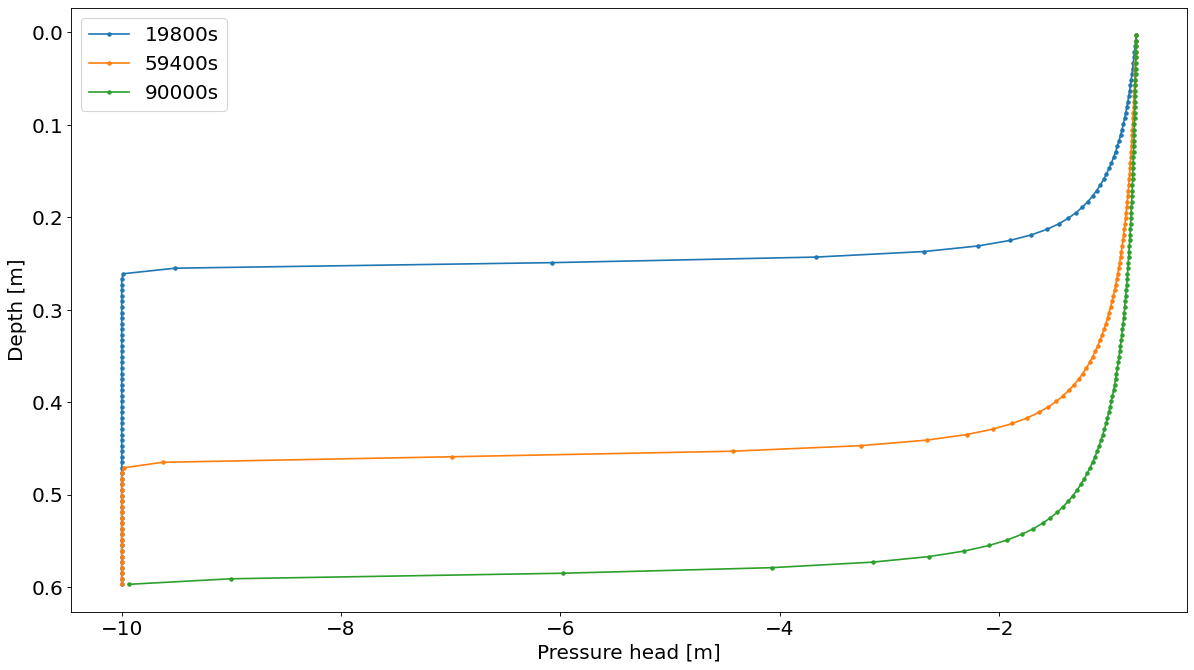

In [8]:
# Open a figure
fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k');

# Plot the data
for time in timesteps:
    
    # legend label
    time_cur = ds['time'][time].dt.round('s') # Extract time @ timestep, rounded to the nearest second
    time_dif = pd.to_datetime(time_cur.data) - time_ref # time_cur is a datetime64 object, needs to be datetime
    lbl = str(round(time_dif.total_seconds())) + 's' # round() gets rid of the decimal 0 that's added by default
    
    # data
    plt.plot(ds['mLayerMatricHead'].isel(time=time,midToto=midToto), ds['mLayerHeight'].isel(time=time), \
             marker='.', label=lbl);

# Make sure that increasing depth points downward
plt.gca().invert_yaxis()

# Labels
plt.xlabel('Pressure head [m]'); # note, ';' supresses output from the Text object that is created for the labels
plt.ylabel('Depth [m]');
plt.legend();

# Save the figure
plt.savefig('img/lt1_celia1990.png');